<a href="https://colab.research.google.com/github/jihoonin/Face-recognition-/blob/main/05_FER2013_dataset_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
FER-2013 데이터셋을 다운로드하고 전처리하여 학습, 검증, 테스트 세트로 분할

데이터셋 로드 성공:


,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training



감정 분포:
emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

DATA 분포:
Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

샘플 이미지 시각화:


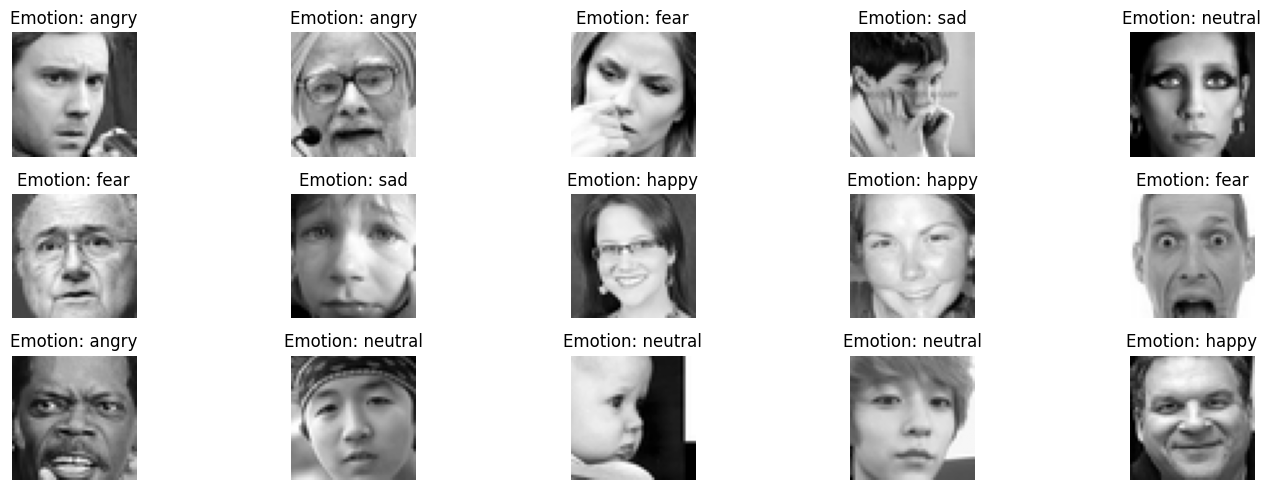

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = "/content/drive/MyDrive/data/fer2013.csv"

emotion_labels = {
    0: 'angry',
    1: 'disgust',
    2: 'fear',
    3: 'happy',
    4: 'sad',
    5: 'surprise',
    6: 'neutral'
}


try:
    # Load the dataset
    df = pd.read_csv(filepath)
    print("데이터셋 로드 성공:")
    display(df.head(10))


    # Convert the pixel strings into numpy arrays
    df['pixels'] = df['pixels'].apply(lambda x: np.array(x.split()).astype('float32'))

    # The 'emotion' column contains the labels
    # Let's see the distribution of emotions
    print("\n감정 분포:")
    print(df['emotion'].value_counts())

    print("\nDATA 분포:")
    print(df['Usage'].value_counts())

    # We can optionally visualize a few images
    print("\n샘플 이미지 시각화:")
    a, b = 3, 5 # Define a and b for subplot rows and columns
    fig, axes = plt.subplots(a, b, figsize=(15, 5))
    for i in range(a*b):
        pixels = df['pixels'].iloc[i].reshape(48, 48) # Assuming images are 48x48
        emotion_code = df['emotion'].iloc[i]
        emotion_name = emotion_labels.get(emotion_code, 'unknown') # Get emotion name using the mapping
        row_index = i // b # Calculate row index
        col_index = i % b # Calculate col index
        axes[row_index, col_index].imshow(pixels, cmap='gray') # Access subplot using row and column indices
        axes[row_index, col_index].set_title(f"Emotion: {emotion_name}") # Use emotion name in the title
        axes[row_index, col_index].axis('off')
    plt.tight_layout() # Adjust layout to prevent titles overlapping
    plt.show()

except FileNotFoundError:
    print(f"오류: '{filepath}' 파일을 찾을 수 없습니다. 파일을 업로드했는지 확인해주세요.")
except Exception as e:
    print(f"데이터 로드 또는 전처리 중 오류 발생: {e}")

## 데이터 분할


In [ ]:
train_df = df[df['Usage'] == 'Training']
val_df = df[df['Usage'] == 'PublicTest']
test_df = df[df['Usage'] == 'PrivateTest']

print(f"훈련 세트 크기: {len(train_df)}")
print(f"검증 세트 크기: {len(val_df)}")
print(f"테스트 세트 크기: {len(test_df)}")

훈련 세트 크기: 28709
검증 세트 크기: 3589
테스트 세트 크기: 3589


## 데이터셋 및 데이터 로더 생성




In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class FER2013Dataset(Dataset):
    def __init__(self, dataframe):
        self.labels = dataframe['emotion'].values
        # Ensure pixels are numpy arrays of float32 and normalize
        self.images = np.stack(dataframe['pixels'].values).astype('float32') / 255.0
        # Reshape images to (N, 1, H, W) where N is number of samples, 1 is channels, H and W are height and width
        self.images = self.images.reshape(-1, 1, 48, 48)


    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = torch.tensor(self.images[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return image, label

# Instantiate the datasets
train_dataset = FER2013Dataset(train_df)
val_dataset = FER2013Dataset(val_df)
test_dataset = FER2013Dataset(test_df)

print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

# Create DataLoaders
batch_size = 64 # Define batch size
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print("\nPyTorch Datasets and DataLoaders created successfully.")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")
print(f"Number of test batches: {len(test_loader)}")

Training set size: 28709
Validation set size: 3589
Test set size: 3589

PyTorch Datasets and DataLoaders created successfully.
Number of training batches: 449
Number of validation batches: 57
Number of test batches: 57


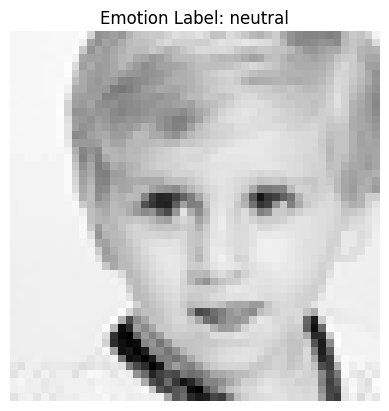

Image shape: torch.Size([1, 48, 48])
Label: 6
Emotion Name: neutral


In [ ]:
# Get a batch of data from the training loader
images, labels = next(iter(train_loader))

# Take the first image and label from the batch
sample_image = images[0]
sample_label = labels[0]

# Convert the PyTorch tensor to a NumPy array for displaying
# Remove the channel dimension (1) and denormalize for display (multiply by 255)
sample_image_np = sample_image.squeeze(0).cpu().numpy() * 255.0

# Display the image
plt.imshow(sample_image_np, cmap='gray')
plt.title(f"Emotion Label: {emotion_labels.get(sample_label.item(), 'unknown')}")
plt.axis('off')
plt.show()

print(f"Image shape: {sample_image.shape}")
print(f"Label: {sample_label.item()}")
print(f"Emotion Name: {emotion_labels.get(sample_label.item(), 'unknown')}")

## Cnn 모델 정의



In [ ]:
import torch.nn as nn
import torch.nn.functional as F # Often useful for activation functions and pooling

class EmotionCNN(nn.Module):
    def __init__(self, num_classes=7):
        super(EmotionCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        # First pooling layer
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        # First dropout layer
        self.dropout1 = nn.Dropout(0.25) # Add dropout after pooling

        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3,stride=1, padding=1)
        # Second pooling layer
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Second dropout layer
        self.dropout2 = nn.Dropout(0.25) # Add dropout after pooling

        # Third convolutional layer
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3,stride=1, padding=1)
        # Third pooling layer
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        # Third dropout layer
        self.dropout3 = nn.Dropout(0.25) # Add dropout after pooling

        # Calculate the size of the flattened tensor after convolutional and pooling layers
        # Input image size is 48x48. After 3 pooling layers with kernel size 2 and stride 2,
        # the spatial dimensions will be (48 / 2 / 2 / 2) = 6x6
        self._to_linear = 128 * 6 * 6 # output channels of last conv * final height * final width

        # First fully connected layer
        self.fc1 = nn.Linear(self._to_linear, 512)
        # Fourth dropout layer (after first FC layer)
        self.dropout4 = nn.Dropout(0.5)

        # Second fully connected layer (output layer)
        self.fc2 = nn.Linear(512, num_classes)

    def forward(self, x):
        # Apply first conv -> relu -> pool -> dropout
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.dropout1(x)

        # Apply second conv -> relu -> pool -> dropout
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.dropout2(x)

        # Apply third conv -> relu -> pool -> dropout
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.dropout3(x)

        # Flatten the tensor for the fully connected layers
        x = x.view(-1, self._to_linear) # or x = torch.flatten(x, 1)

        # Apply first FC -> relu -> dropout
        x = F.relu(self.fc1(x))
        x = self.dropout4(x)

        # Apply second FC (output layer)
        x = self.fc2(x)

        return x

print("EmotionCNN model class defined successfully.")

EmotionCNN model class defined successfully.


## 모델 훈련



In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn

# Instantiate the model
model = EmotionCNN(num_classes=7)

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.002)

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Set device (GPU if available, otherwise CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print(f"Using device: {device}")

# Training and Validation Loop
num_epochs = 50 # Define the number of epochs
best_val_accuracy = 0.0
best_train_accuracy = 0.0 # Initialize best train accuracy
model_save_path = "best_emotion_cnn_model.pth" # Define path to save the best model

# Lists to store training and validation metrics
train_losses = []
val_losses = []
val_accuracies = []
train_accuracies = [] # List to store training accuracies

for epoch in range(num_epochs):
    # Training Phase
    model.train() # Set model to training mode
    running_train_loss = 0.0
    correct_train_predictions = 0 # Initialize correct train predictions
    total_train_predictions = 0 # Initialize total train predictions

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item() * images.size(0)

        # Calculate training accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_train_predictions += labels.size(0)
        correct_train_predictions += (predicted == labels).sum().item()


    epoch_train_loss = running_train_loss / len(train_dataset)
    epoch_train_accuracy = correct_train_predictions / total_train_predictions # Calculate epoch train accuracy
    train_losses.append(epoch_train_loss) # Store training loss
    train_accuracies.append(epoch_train_accuracy) # Store training accuracy


    # Validation Phase
    model.eval() # Set model to evaluation mode
    running_val_loss = 0.0
    correct_val_predictions = 0 # Initialize correct validation predictions
    total_val_predictions = 0 # Initialize total validation predictions


    with torch.no_grad(): # Disable gradient calculation during validation
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            running_val_loss += loss.item() * images.size(0)

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total_val_predictions += labels.size(0)
            correct_val_predictions += (predicted == labels).sum().item()

    epoch_val_loss = running_val_loss / len(val_dataset)
    epoch_val_accuracy = correct_val_predictions / total_val_predictions
    val_losses.append(epoch_val_loss) # Store validation loss
    val_accuracies.append(epoch_val_accuracy) # Store validation accuracy

    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {epoch_train_loss:.4f}, "
          f"Train Accuracy: {epoch_train_accuracy:.4f}, " # Print training accuracy
          f"Validation Loss: {epoch_val_loss:.4f}, "
          f"Validation Accuracy: {epoch_val_accuracy:.4f}")

    # Save the best model
    if epoch_val_accuracy > best_val_accuracy:
        best_val_accuracy = epoch_val_accuracy
        torch.save(model.state_dict(), model_save_path)
        print(f"Saved best model with validation accuracy: {best_val_accuracy:.4f}")

    # Update best train accuracy
    if epoch_train_accuracy > best_train_accuracy:
        best_train_accuracy = epoch_train_accuracy


print("\nTraining finished.")
print(f"Best validation accuracy achieved: {best_val_accuracy:.4f}")
print(f"Best train accuracy achieved: {best_train_accuracy:.4f}") # Print best train accuracy

Using device: cuda
Epoch [1/50], Train Loss: 1.7389, Train Accuracy: 0.2943, Validation Loss: 1.6007, Validation Accuracy: 0.3906
Saved best model with validation accuracy: 0.3906
Epoch [2/50], Train Loss: 1.5795, Train Accuracy: 0.3812, Validation Loss: 1.4749, Validation Accuracy: 0.4377
Saved best model with validation accuracy: 0.4377
Epoch [3/50], Train Loss: 1.4853, Train Accuracy: 0.4246, Validation Loss: 1.3648, Validation Accuracy: 0.4893
Saved best model with validation accuracy: 0.4893
Epoch [4/50], Train Loss: 1.4197, Train Accuracy: 0.4539, Validation Loss: 1.3184, Validation Accuracy: 0.4935
Saved best model with validation accuracy: 0.4935
Epoch [5/50], Train Loss: 1.3728, Train Accuracy: 0.4712, Validation Loss: 1.2897, Validation Accuracy: 0.5007
Saved best model with validation accuracy: 0.5007
Epoch [6/50], Train Loss: 1.3439, Train Accuracy: 0.4848, Validation Loss: 1.2827, Validation Accuracy: 0.5121
Saved best model with validation accuracy: 0.5121
Epoch [7/50], T

평가

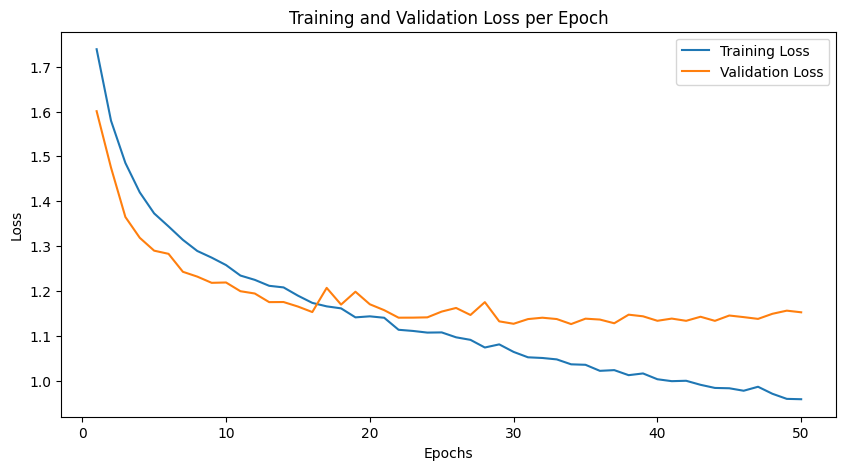

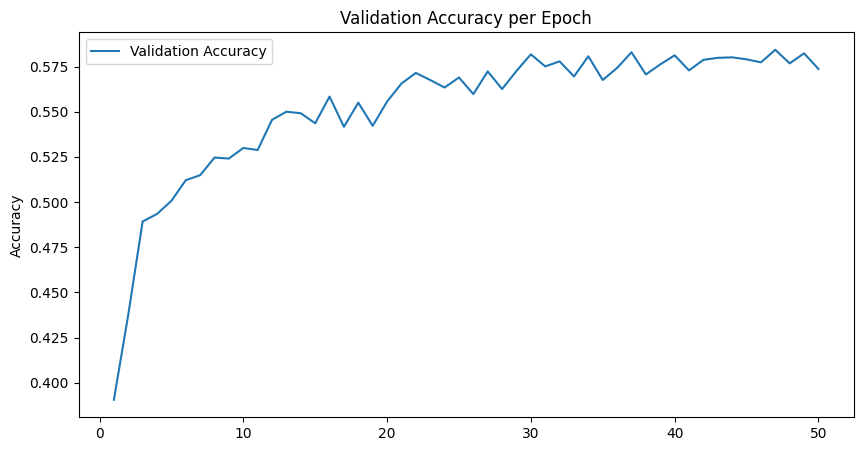

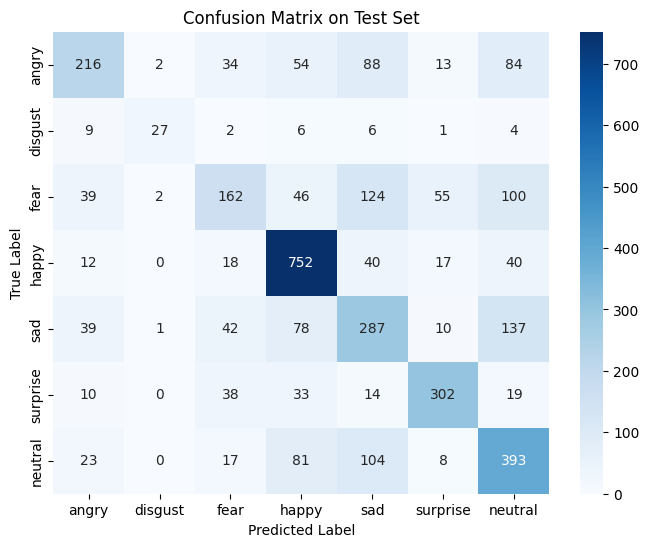


Classification Report on Test Set:
              precision    recall  f1-score   support

       angry       0.62      0.44      0.51       491
     disgust       0.84      0.49      0.62        55
        fear       0.52      0.31      0.39       528
       happy       0.72      0.86      0.78       879
         sad       0.43      0.48      0.46       594
    surprise       0.74      0.73      0.73       416
     neutral       0.51      0.63      0.56       626

    accuracy                           0.60      3589
   macro avg       0.63      0.56      0.58      3589
weighted avg       0.60      0.60      0.59      3589



In [ ]:
# Assuming you have stored training and validation loss/accuracy per epoch
# You would need to modify the training loop to store these values in lists

epochs = range(1, len(train_losses) + 1)

# Plotting loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, val_losses, label='Validation Loss')
plt.title('Training and Validation Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs, val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# To analyze test set predictions, you would need to collect predictions and true labels
# from the test_loader evaluation loop.

# Example of how to get predictions and true labels from the test set:
all_labels = []
all_predictions = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Confusion Matrix
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels.values(), yticklabels=emotion_labels.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()

# Classification Report
print("\nClassification Report on Test Set:")
print(classification_report(all_labels, all_predictions, target_names=emotion_labels.values(), zero_division=0))

In [ ]:
# Load the best model state dictionary
model = EmotionCNN(num_classes=7) # Instantiate the model again
model.load_state_dict(torch.load(model_save_path)) # Load the saved weights
model.to(device) # Move the model to the appropriate device

model.eval() # Set the model to evaluation mode
running_test_loss = 0.0
correct_predictions = 0
total_predictions = 0

with torch.no_grad(): # Disable gradient calculation
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        running_test_loss += loss.item() * images.size(0)

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

test_loss = running_test_loss / len(test_dataset)
test_accuracy = correct_predictions / total_predictions

print(f"테스트 손실: {test_loss:.4f}")
print(f"테스트 정확도: {test_accuracy:.4f}")

테스트 손실: 1.0687
테스트 정확도: 0.6007
